# ANOVA and Design of Experiments

## Problem #1 - DoE
Use the following data to conduct a Design of Experiments analysis by hand (i.e. not using R). This is a $2^3$ design, which is about the limit of complexity you'd want to handle by hand. You should produce a table similar to  those in page 52 the DOE slides.  I've provided a generic $2^3$ table below; you would augment it to include the data below.

In [1]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/avt4011oc9f8qk6/3-factor-sign-table.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
signTable = read.csv(temporaryFile)

In [2]:
signTable$Y = c(100, 15, 40, 30, 120, 110, 20, 50)
signTable

,I,A,B,C,AB,AC,BC,ABC,Y
1,1,-1,-1,-1,1,1,1,-1,100
2,1,-1,-1,1,1,-1,-1,1,15
3,1,-1,1,-1,-1,1,-1,1,40
4,1,-1,1,1,-1,-1,1,-1,30
5,1,1,-1,-1,-1,-1,1,1,120
6,1,1,-1,1,-1,1,-1,-1,110
7,1,1,1,-1,1,-1,-1,-1,20
8,1,1,1,1,1,1,1,1,50


You should compute terms qA, qB, .., qABC, or the effects size of each term.

In [36]:
qA = (-100-15-40-30+120+110+20+50)/8

qB = (-100-15+40+30-120-110+20+50)/8

qC = (-100+15-40+30-120+110-20+50)/8

qAB = (+100+15-40-30-120-110+20+50)/8

qAC = (+100-15+40-30-120+110-20+50)/8

qBC = (+100-15-40+30+120-110-20+50)/8

qABC = (-100+15+40-30+120-110-20+50)/8

effects = c(qA, qB, qC, qAB, qAC, qBC, qABC)
effects

[1]  14.375 -25.625  -9.375 -14.375  14.375  14.375  -4.375

Now, compute the percentage variation due to each

In [45]:
#Find sst
eff = c(qA,qB,qC,qAB,qAC,qBC,qABC)
eff2 = eff^2
(SST = sum(8*eff2))

#Find percentage variation due to each
(8*eff2/SST)
(8*eff2)

[1] 12721.88

[1] 0.12994350 0.41292066 0.05526898 0.12994350 0.12994350 0.12994350 0.01203635

[1] 1653.125 5253.125  703.125 1653.125 1653.125 1653.125  153.125

You can now compare it to the results using the **lm** and **anova** functions

In [64]:
model = lm(Y ~ A + B + C + AB + AC + BC + ABC , data=signTable)
(model)

fit <- aov(Y ~ A*B*C, data=signTable)
(fit)

fit2 <- anova(model)
(fit2)


Call:
lm(formula = Y ~ A + B + C + AB + AC + BC + ABC, data = signTable)

Coefficients:
(Intercept)            A            B            C           AB           AC  
     60.625       14.375      -25.625       -9.375      -14.375       14.375  
         BC          ABC  
     14.375       -4.375  


Call:
   aov(formula = Y ~ A * B * C, data = signTable)

Terms:
                       A        B        C      A:B      A:C      B:C    A:B:C
Sum of Squares  1653.125 5253.125  703.125 1653.125 1653.125 1653.125  153.125
Deg. of Freedom        1        1        1        1        1        1        1

Estimated effects are balanced

Warning message:
In anova.lm(model): ANOVA F-tests on an essentially perfect fit are unreliable

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
A,1,1653.125,1653.125,NaN,NaN
B,1,5253.125,5253.125,NaN,NaN
C,1,703.125,703.125,NaN,NaN
AB,1,1653.125,1653.125,NaN,NaN
AC,1,1653.125,1653.125,NaN,NaN
BC,1,1653.125,1653.125,NaN,NaN
ABC,1,153.125,153.125,NaN,NaN
Residuals,0,0,NaN,NA,NA


## Problem #2 - 2-Level Dhrystone
This file (dhry-2level.csv) contains the following table

In [70]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/1eabtdr5tsrtlaf/dhry-2level.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
dhry2lvl = read.csv(temporaryFile)
dhry2lvl # - print this out and it will have 24 rows

,trial,a,f,g,mips
1,0,-1,-1,-1,1436.745
2,1,-1,-1,-1,1442.571
3,2,-1,-1,-1,1442.205
4,0,1,-1,-1,1460.335
5,1,1,-1,-1,1434.212
6,2,1,-1,-1,1439.288
7,0,-1,1,-1,1327.825
8,1,-1,1,-1,1321.352
9,2,-1,1,-1,1328.135
10,0,1,1,-1,1319.209


This is the result of running a $3*2^3$ experimental design for evaluating the importance of certain compiler optimizations -- you can ignore their meaning for this problem (this is a subset of data from an experiment described below).  Use R to conduct an analysis of variance for this data.

a) Set up a linear model. 
Treat the a, f and g level as categorical factors. 
You can do this using e.g. 

     data$bits = factor(data$bits).


In [55]:
fact_a = factor(dhry2lvl$a)
fact_f = factor(dhry2lvl$f)
fact_g = factor(dhry2lvl$g)

dhry2lvl$a = factor(dhry2lvl$a)
dhry2lvl$f = factor(dhry2lvl$f)
dhry2lvl$g = factor(dhry2lvl$g)
#afg = data.frame(dhry2lvl$a,dhry2lvl$f,dhry2lvl$g)

m = lm(mips ~ a*f*g, data=dhry2lvl)

b) Report the linear model.

In [58]:
(m)
summary(m)


Call:
lm(formula = mips ~ a * f * g, data = dhry2lvl)

Coefficients:
(Intercept)           a1           f1           g1        a1:f1        a1:g1  
  1440.5070       4.1047    -114.7363       4.8220       0.6523      17.5640  
      f1:g1     a1:f1:g1  
     8.5200     -34.2030  



Call:
lm(formula = mips ~ a * f * g, data = dhry2lvl)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.319  -6.148   1.662   5.069  17.420 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1440.5070     6.3922 225.355  < 2e-16 ***
a1             4.1047     9.0399   0.454   0.6559    
f1          -114.7363     9.0399 -12.692 9.09e-10 ***
g1             4.8220     9.0399   0.533   0.6011    
a1:f1          0.6523    12.7843   0.051   0.9599    
a1:g1         17.5640    12.7843   1.374   0.1884    
f1:g1          8.5200    12.7843   0.666   0.5146    
a1:f1:g1     -34.2030    18.0798  -1.892   0.0768 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.07 on 16 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.968 
F-statistic: 100.4 on 7 and 16 DF,  p-value: 5.093e-12


c) Note that R reports this differently for categorical data. The report should be missing terms for "a", "f" and so on. Why is that? What does the intercept represent? Note that categorical values must take one some value and the intercept needs to include the results of some value(s).

d) Determine the percentage of variation attributable to each factor. You can do this using the anova table as described in the lecture notes.

In [69]:
anova(m)
sst = sum(anova(m)$Sum)
pct_var = anova(m)$Sum/sst
(pct_var)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,130.4101,130.4101,1.063884,0.3176712
f,1,84539.45,84539.45,689.6719,1.385664e-14
g,1,520.4198,520.4198,4.245579,0.05599911
a:f,1,405.8626,405.8626,3.311023,0.08757807
a:g,1,0.3208594,0.3208594,0.002617567,0.9598296
f:g,1,110.4632,110.4632,0.9011577,0.356591
a:f:g,1,438.692,438.692,3.578844,0.07676194
Residuals,16,1961.268,122.5792,NA,NA


[1] 1.480136e-03 9.595101e-01 5.906687e-03 4.606480e-03 3.641706e-06
[6] 1.253741e-03 4.979088e-03 2.226010e-02

e) Compute the 95% confidence interval for the "opt" factor.  The "anova" function doesn't do this, but you can see something similar using

     confint( aov (l ) )
     
where 'l' is your linear model. For models involving factors, the confidence interval is expressed for the different levels in each categorical factor.

In [71]:
confint(aov(m))

,2.5 %,97.5 %
(Intercept),1426.956,1454.058
a1,-15.05903,23.26836
f1,-133.90003,-95.57264
g1,-14.3417,23.9857
a1:f1,-26.44923,27.75389
a1:g1,-9.537558,44.665558
f1:g1,-18.58156,35.62156
a1:f1:g1,-72.530392,4.124392


f) Plot out the diagnostic plots for the model. You can do this using "plot(aov(l))" where "l" is your model. Can you justify that your model is reasonable?

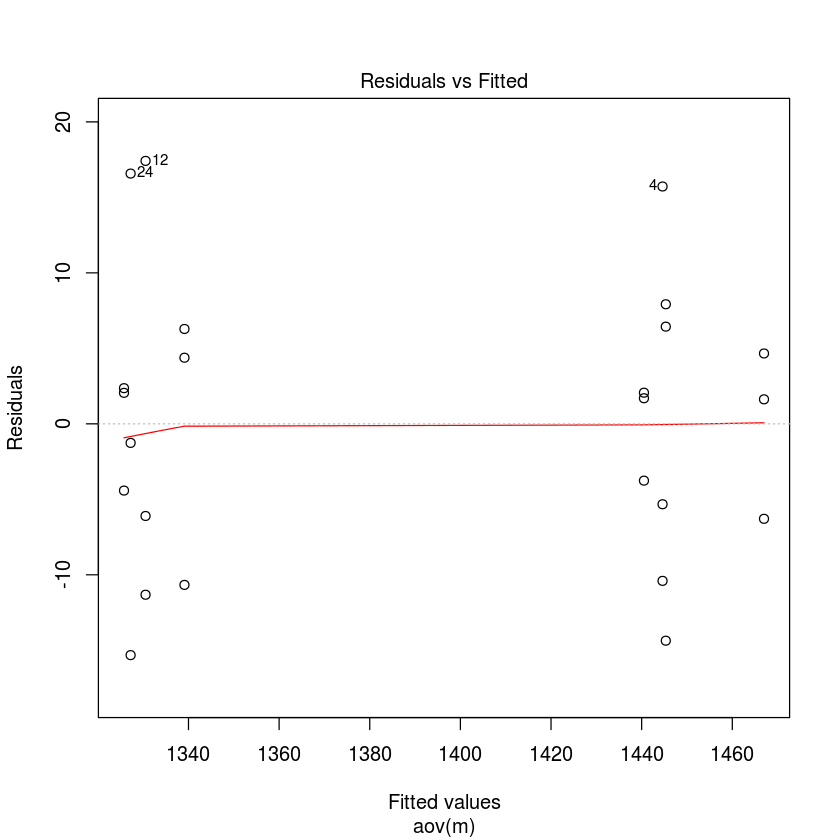

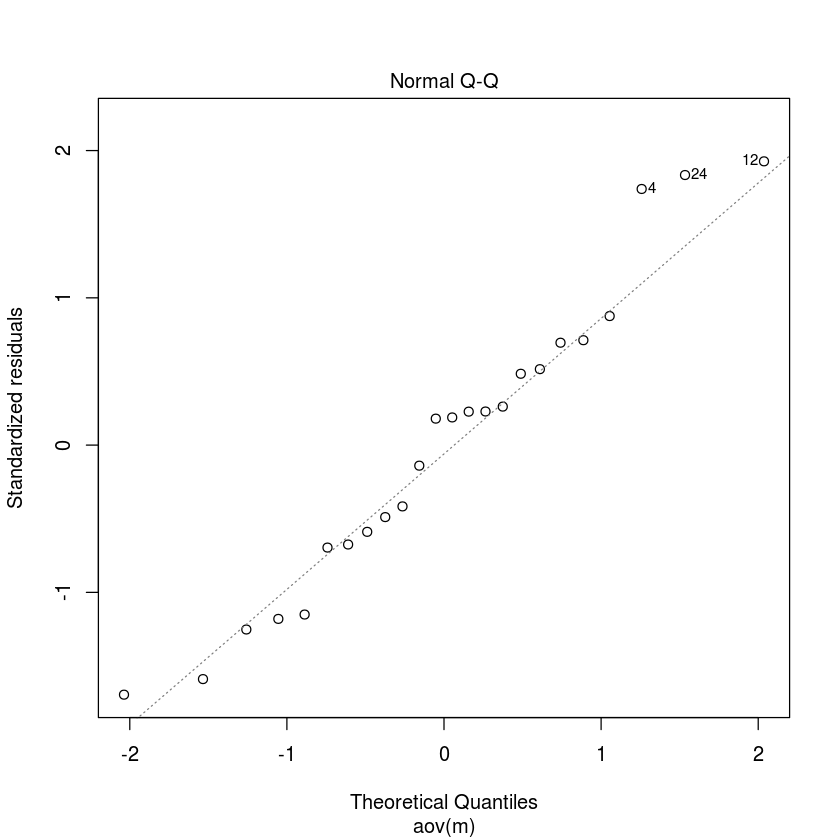

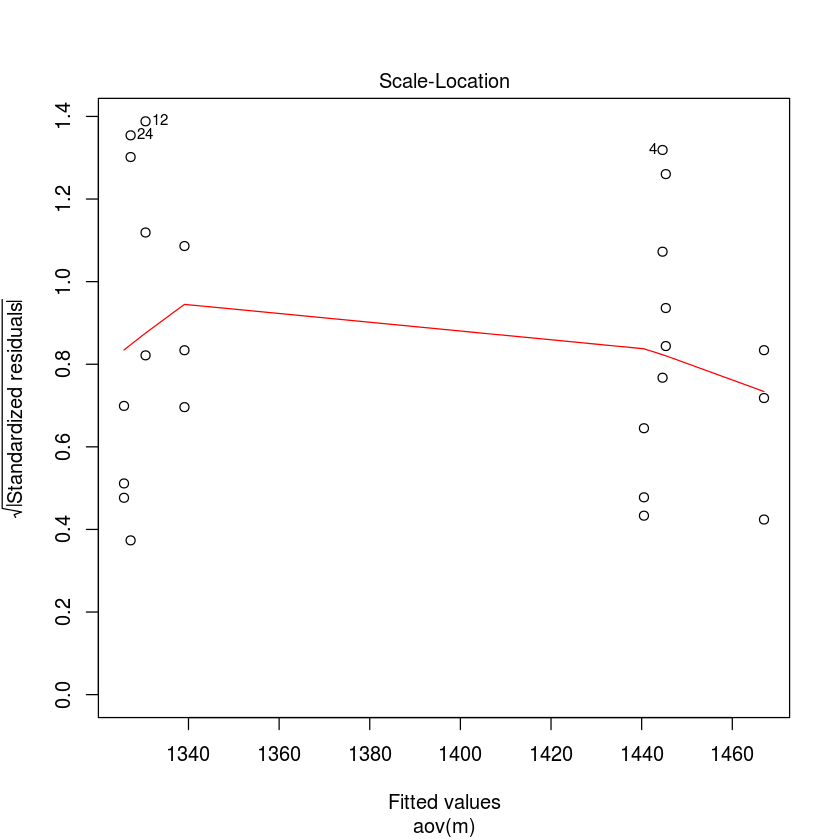

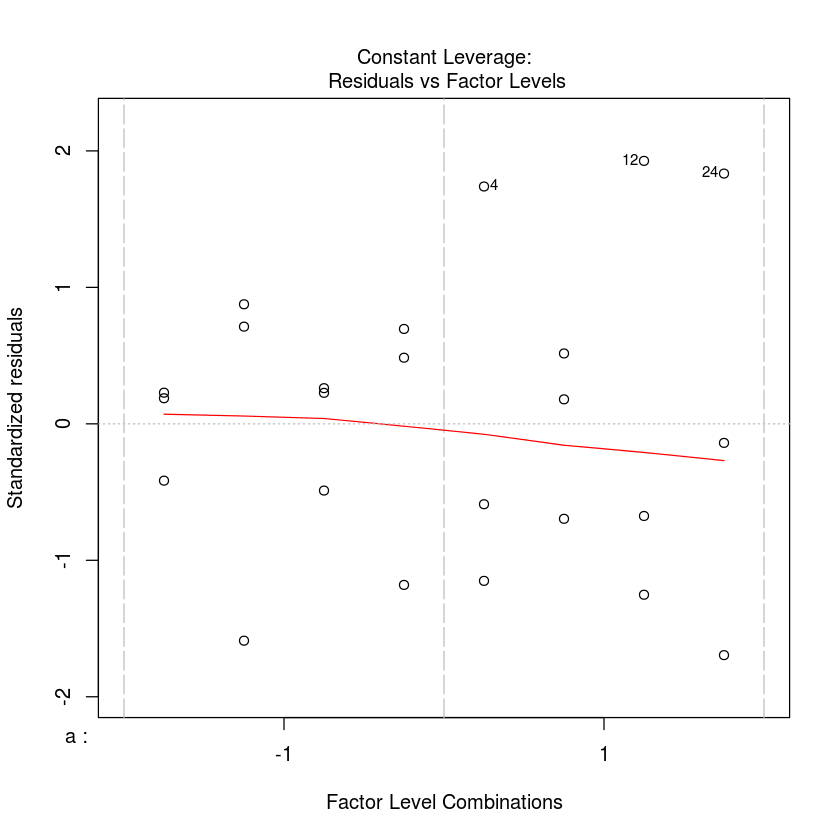

In [72]:
plot(aov(m))

## Problem #3 - 
The file OUTPUT-optlevel (see below) contains data from a 4*2*2 study with 2 replicates. The first column is the trial number (you shouldn't include this in you model, or you won't get any "residuals"). The first factor ('opt') has four levels (-O0, -O1, -O2, -O3). The second factor ('bits') has two levels (specifying -m32 or -m64 for compilation as a 32-bit or 64-bit application) and the third ('benchmark') has two levels (dhry11 or dhry21). In each case, the dependent variable is the performance in VAX MIPS (this is the output of the Dhrystone program). Use R to conduct an analysis of variance for this data.

In [5]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/l0lenc8prwfo7e3/OUTPUT-optlevels.orig?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
optlevels = read.csv(temporaryFile)
# optlevels # - this will have 32 rows

a) Set up a linear model. Treat the bits, progs and optimization level as catagorical factors.

b) Report the linear model. Note that R reports this differently for catagorical data. The report should be missing terms for "opt0", "bits0" and so on. Why is that? What does the intercept represent?

c) Determine the percentage of variation attributable to each factor. You can do this using the anova table.

d) Compute the 95% confidence interval for the "opt" factor.  The "anova" function doesn't do this, but you can see something similar using

     confint( aov (l ) )
     
where 'l' is your linear model. For models involving factors, the confidence interval is expressed for the different levels in each categorical factor.

e) Plot out the diagnostic plots for the model. You can do this using "plot(aov(l))" where "l" is your model. Can you justify that your model is reasonable

## Problem #4 - 
This file (OUTPUT-21.csv) contains a $3*2^7$ experiment. The data was generated from the dhrystone 2.1 benchmark on a specific machine. The factors in the experiment correspond to different optimizations as indicated in the RUN script:

    DATA = ( 
    ('-fstrength-reduce', '-fno-strength-reduce'), # a 
    ('-fgcse', '-fno-gcse'), # b 
    ('-floop-optimize', '-fno-loop-optimize'), # c 
    ('-fpeephole', '-fno-peephole'), # d 
    ('-finline-functions', '-fno-inline-functions'), # e 
    ('-fomit-frame-pointer', '-fno-omit-frame-pointer'), # f 
    ('-fwhole-program', '-fno-whole-program') # g 
    ) 

each factor has two levels - either the optimization is enabled or not. In my model, I called the factors o.a, o.b, o.c, etc for the different possible optimizations.

In [6]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/0hq1r63ym1h904q/OUTPUT-21.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
fullOpt = read.csv(temporaryFile)
#fullOpt # - if you print this out, it will have 384 rows

a) There are several terms that contribute more variation to the results than the error/residual term, but most of the terms contribute little variation to the overall performance. Determine which single factor contributes in some meaningful way to variation in performance and report the percentage of variation explained by that single term. Explain how you did this.

b) What 2-factor interaction of factors contributes in some meaningful way to variation in performance. Explain how you determine which factors you're including.

c) There any two significant intercations that involve more than 2 factors. List those & explain how you did this.

## Problem #4 - reduced
I've taken the data from the previous question and prepared a $3 * 2^{7-4}$ design table.  You're  left with a 24 row table (8 factors, repeated 3 times). This is in the following table.

In [7]:
temporaryFile <- tempfile()
download.file("https://www.dropbox.com/s/n9urefzm9jzggh6/OUTPUT-21-reduced.csv?dl=0",
                  destfile=temporaryFile, method="curl", extra="-L")
reducedOpt = read.csv(temporaryFile)
# reducedOpt # if you print this out, it will have 24 rows

a) Again, there should be a single factor that explains the most variation, but the percentage of variation explained by that factor should now be different. Compute the percentage for that single factor.

b) Now, determine why that variation is different. Show that the "F" factor is confounded with the ABCDEG factor and explain why that changes the variation attributed to F.